In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from directory2 import Directory

#### Defining the directory to analyze

In [4]:
dir = Directory(r'C:\Users\BLUO\AppData\Local\Temp')
# dir = Directory(r'C:\Users\BLUO\Downloads\report\tests\resources\directory_test_files')

#### Exploring the CSV report

In [5]:
dir.generate_report('./report_split.csv', split_metadata=True, exclude_str=['.venv', '.pytest_cache', '.vscode', '__pycache__'])
# dir.generate_report('./report_no_split.csv', split_metadata=False)
# dir.generate_report('./report_filtered.csv', split_metadata=False, filters={'extensions': ['.csv', '.docx', '.pptx', '.xlsx']})
# dir.generate_report('./report_migrate.csv', split_metadata=False, migrate_filters={'extensions': ['.csv', '.docx', '.pptx', '.xlsx']})

#### Filtering out the data of interest

In [4]:
df = pd.DataFrame.from_dict(dir.generate_analytics(exclude_str=['.venv', '.pytest_cache', '.vscode', '__pycache__']), orient='index')
df.rename(columns={'Size (MB)': 'size', 'Count': 'count'}, inplace=True)
df

,size,count
.ini,0.000282,1
.htm,1.227377,4
.svg,0.008037,1
.pptx,302.427328,25
.ipynb,0.094249,10
.png,35.570454,19
.jpg,10.416532,14
,14.324555,584
.py,1.354166,174
.md,0.019178,8


#### Visualizing the filtered data

Text(0.5, 1.0, 'File types by Count and Size (mb)')

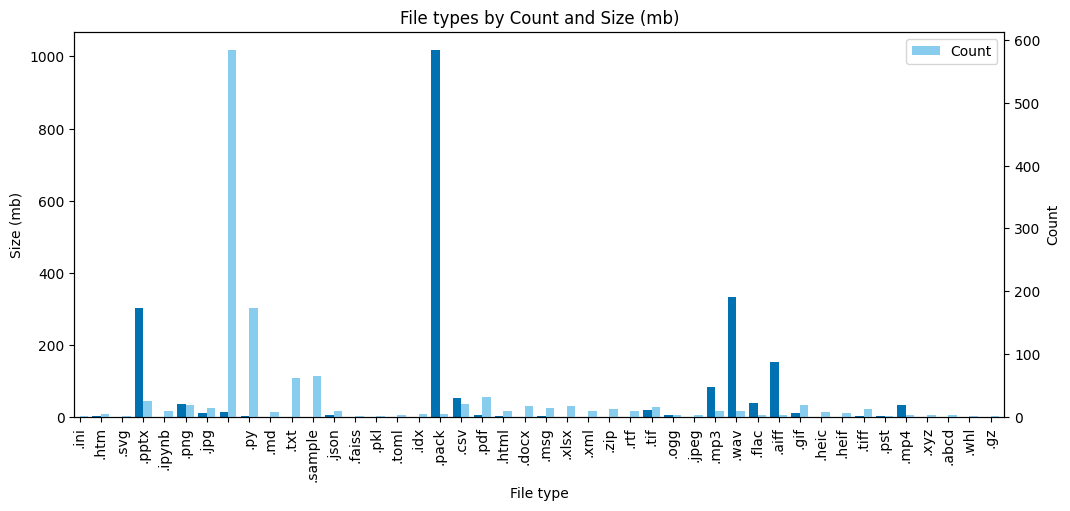

In [5]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax2.yaxis.get_major_locator().set_params(integer=True)

width = 0.4

(df['size']).plot(kind='bar', color='#0072b2', ax=ax, width=width, position=1, label='Size (mb)')
df['count'].plot(kind='bar', color='#88ccee', ax=ax2, width=width, position=0, label='Count')

ax.set_ylabel('Size (mb)')
ax2.set_ylabel('Count')
ax.set_xlabel('File type')

plt.legend()
plt.title('File types by Count and Size (mb)')


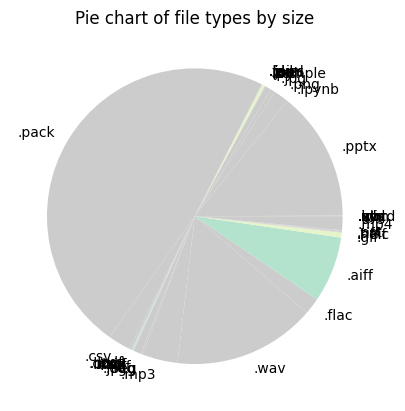

In [6]:
import matplotlib.pyplot as plt

labels = df.index
sizes = df['size']

cmap = plt.get_cmap("Pastel2")

plt.title('Pie chart of file types by size')
plt.pie(sizes, labels=labels, colors=cmap(np.arange(11)*4))
plt.show()